## Decision Tree

<h3>Manual</h3>

In [1]:
import pandas as pd
import math
import pprint

def entropy(col):
    e = 0
    n = len(col)
    count = col.value_counts()
    for decision in col.unique():
        e -= count[decision] / n * math.log2(count[decision] / n)
    return e

def id3(df, target, features):
    if len(df[target].unique()) == 1:
        return df[target].iloc[0]
    
    if not features:
        return df[target].mode()[0]
    
    best_feature = max(features, key=lambda col: gain(df, col, target))
    tree = {best_feature: {}}
    
    for value in df[best_feature].unique():
        subset = df[df[best_feature] == value]
        tree[best_feature][value] = id3(subset, target, [f for f in features if f != best_feature])
    
    return tree

def gain(df, col, target):
    g = entropy(df[target])
    for value in df[col].unique():
        table = df[df[col] == value]
        g -= len(table) / len(df[col]) * entropy(table[target])
    return g

def classify(tree, sample):
    if not isinstance(tree, dict):
        return tree
    feature = next(iter(tree))
    value = sample[feature]
    subtree = tree.get(feature, {}).get(value, "Unknown")
    return classify(subtree, sample) if isinstance(subtree, dict) else subtree

data= pd.read_csv('weather.csv')


df = pd.DataFrame(data)
features = list(df.columns[:-1])
target = "Play"

decision_tree = id3(df, target, features)
print("Decision Tree:")
pprint.pprint(decision_tree)

sample = {"Outlook": "Sunny", "Temp": "Cool", "Humidity": "Normal", "Wind": "Weak"}
print("\nPrediction for new sample:", classify(decision_tree, sample))



Decision Tree:
{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}

Prediction for new sample: Yes


<h3>Using Library</h3>

Outlook: {'Overcast': 0, 'Rain': 1, 'Sunny': 2}
Temperature: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity: {'High': 0, 'Normal': 1}
Wind: {'Strong': 0, 'Weak': 1}
Play: {'No': 0, 'Yes': 1}


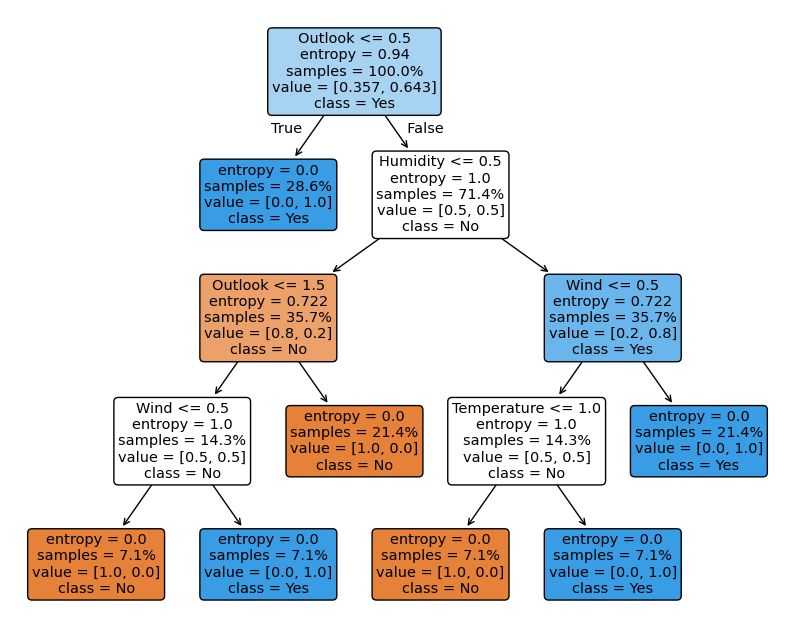

The predicted decision for the sample is: Yes


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('weather.csv')
df = pd.DataFrame(data)

# Encode categorical features with LabelEncoder
encoders = {}
for col in df.columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    # Convert encoded values to Python int for cleaner output
    mapping = {k: int(v) for k, v in zip(encoders[col].classes_, encoders[col].transform(encoders[col].classes_))}
    print(f"{col}: {mapping}")

# Split data into features and target
x = df.drop(columns=["Play"])
y = df["Play"]

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(x, y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=x.columns, class_names=encoders["Play"].classes_,
          filled=True, rounded=True, proportion=True)
plt.show()

# Predict for a new sample
sample = pd.DataFrame([["Sunny", "Mild", "Normal", "Weak"]], columns=x.columns)

# Encode the sample using the same label encoders
for col in sample.columns:
    sample[col] = encoders[col].transform(sample[col])

# Make prediction and decode the result
predicted = encoders["Play"].inverse_transform(clf.predict(sample))
print(f"The predicted decision for the sample is: {predicted[0]}")
